In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from keras.preprocessing.image import ImageDataGenerator

In [17]:
(X_train,y_train),(X_val,y_val) = load_data()

In [18]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [19]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(X_train)

In [20]:
datagen.fit(X_val)

In [21]:
X_train = X_train/255.0
X_val =X_val/255.0

In [22]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [23]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [24]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_val = to_categorical(y_val,10)

In [25]:
print("Total no. of train data:{}".format(len(X_train)))
print("Total no. of validation data:{}".format(len(X_val)))

Total no. of train data:50000
Total no. of validation data:10000


In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

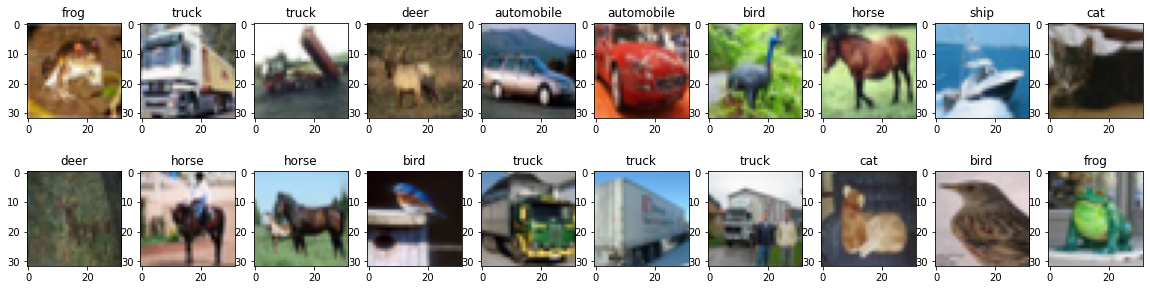

In [28]:
batch_size = 20
fig = plt.figure(figsize=(20,5))
for i in range(batch_size):
    ax = fig.add_subplot(2,batch_size/2,i+1)
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(classes[np.argmax(y_train[i])])

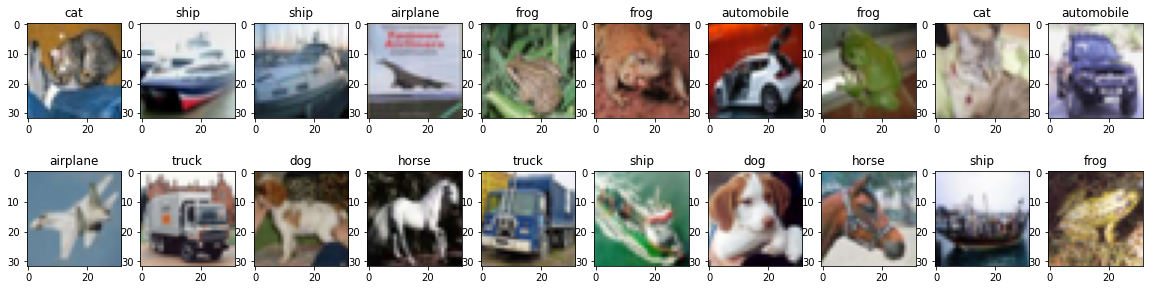

In [29]:
batch_size = 20
fig = plt.figure(figsize=(20,5))
for i in range(batch_size):
    ax = fig.add_subplot(2,batch_size/2,i+1)
    ax.imshow(X_val[i],cmap='gray')
    ax.set_title(classes[np.argmax(y_val[i])])

In [30]:
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import Model, Input

In [80]:
### Using Simple Neural Network

def create_model():
    inp = Input(shape=(32,32,3))
    
    flat = Flatten()(inp)
    
    dense_1 = Dense(512,activation='relu')(flat)

    dense_2 = Dense(512,activation='relu')(dense_1)
    
    dense_3 = Dense(256,activation='relu')(dense_2)
    
    dense_4 = Dense(124,activation='relu')(dense_3)
    
    dense_5 = Dense(64,activation='relu')(dense_4)
    
    out = Dense(10,activation='softmax')(dense_5)
    
    model = Model(inputs = inp, outputs = out)
    
    return model

In [81]:
model = create_model()
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 124)               31868     
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

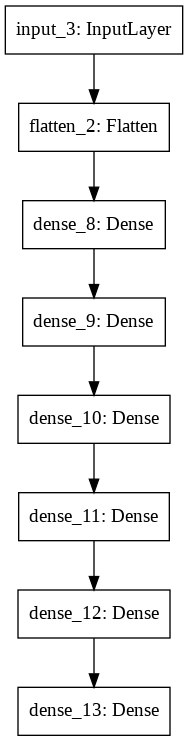

In [82]:
tf.keras.utils.plot_model(model, to_file='model_combined.png')

In [31]:
from tensorflow.keras.optimizers import Adam

In [84]:
opt = Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [85]:
model.compile(optimizer = opt, loss='categorical_crossentropy',metrics=['accuracy'])

path = "log/fits2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)

In [86]:
model.fit(X_train,y_train,epochs=10, validation_data=(X_val,y_val),callbacks=[tensorboard_callback])

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8940 - accuracy: 0.3056 - val_loss: 1.7830 - val_accuracy: 0.3455
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7243 - accuracy: 0.3781 - val_loss: 1.6499 - val_accuracy: 0.4086
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6370 - accuracy: 0.4116 - val_loss: 1.6168 - val_accuracy: 0.4186
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5831 - accuracy: 0.4317 - val_loss: 1.6822 - val_accuracy: 0.4147
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5361 - accuracy: 0.4487 - val_loss: 1.5272 - val_accuracy: 0.4531
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4965 - accuracy: 0.4651 - val_loss: 1.5020 - val_accuracy: 0.4602
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4669 - accuracy: 0.4752 - val_loss: 1.4826 - val_accuracy:

In [88]:
import pandas as pd
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [89]:
test_data.shape

(2000, 3072)

In [90]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,104,108,89,100,104,88,99,103,90,101,106,95,105,110,99,108,110,109,117,116,119,125,123,125,130,128,134,140,138,140,...,184,178,177,172,190,188,184,220,219,214,195,193,187,176,174,169,175,173,168,192,189,185,185,182,178,168,165,161,178,176,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,110,103,105,112,104,105,114,109,105,116,112,106,115,110,108,115,108,107,115,107,104,115,106,104,116,108,108,119,115,108,...,149,153,159,164,132,140,142,134,144,145,112,119,118,108,115,111,114,124,122,106,118,116,101,113,108,100,111,102,99,110,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,93,49,40,52,36,18,24,18,31,38,27,79,91,61,104,117,78,72,84,52,68,79,52,122,131,85,104,113,67,77,...,139,174,188,139,182,198,150,179,194,147,175,186,142,187,195,158,176,191,142,169,190,132,177,193,144,180,189,147,175,190,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,221,233,226,225,231,225,226,223,223,223,223,227,226,231,229,228,236,229,228,236,230,229,236,228,227,235,227,226,234,225,...,20,111,41,28,111,63,60,120,92,98,138,117,129,153,140,158,172,161,187,188,174,205,195,182,212,199,185,216,197,186,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,74,144,39,76,140,37,79,130,38,77,135,40,75,142,43,72,145,47,71,146,47,73,140,43,75,140,39,77,143,37,...,149,42,71,135,43,72,125,42,72,122,51,72,117,64,70,109,65,72,99,53,76,113,35,75,136,30,81,140,34,79,133,41,77,130,44,75,133,42,73,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,156,186,205,153,183,201,153,183,201,152,182,201,152,184,201,149,181,199,146,178,195,152,184,201,149,181,198,147,177,198,155,186,203,143,174,186,135,166,180,153,...,57,24,48,60,27,56,69,30,62,79,32,63,79,37,64,76,33,57,72,36,61,79,37,65,83,35,67,86,36,72,90,40,73,92,49,79,99,46,77,97
1996,68,101,169,69,103,173,70,104,176,71,104,178,73,106,182,77,110,186,81,115,189,85,119,192,89,123,196,92,127,199,97,131,204,102,136,209,112,138,211,107,...,88,65,71,70,57,63,61,49,55,53,65,72,70,68,75,72,58,64,62,43,52,47,40,52,43,45,57,48,56,67,58,61,73,64,51,62,53,49,61,52
1997,216,190,168,219,193,169,214,189,163,188,158,126,157,121,87,143,109,84,133,101,83,127,92,71,119,87,64,151,127,103,201,182,165,173,148,128,132,103,80,140,...,104,184,150,108,180,146,104,173,136,96,170,133,93,150,118,84,134,112,89,149,130,110,171,151,126,174,154,127,179,160,135,182,167,150,184,170,152,188,171,151
1998,46,24,17,43,32,11,77,82,60,117,139,134,115,147,145,123,150,143,136,157,144,139,155,139,141,153,141,148,160,150,154,166,156,151,163,153,155,168,158,156,...,153,104,135,152,102,137,152,98,134,149,102,134,151,102,135,152,104,136,153,103,135,152,105,137,151,104,136,149,102,134,147,102,134,146,100,131,145,99,130,148


In [91]:
test_data = test_data.to_numpy()
test_data=test_data/255.0
test_data=test_data.reshape(-1,32,32,3)

In [92]:
prediction=model.predict(test_data)

In [93]:
prediction.shape

(2000, 10)

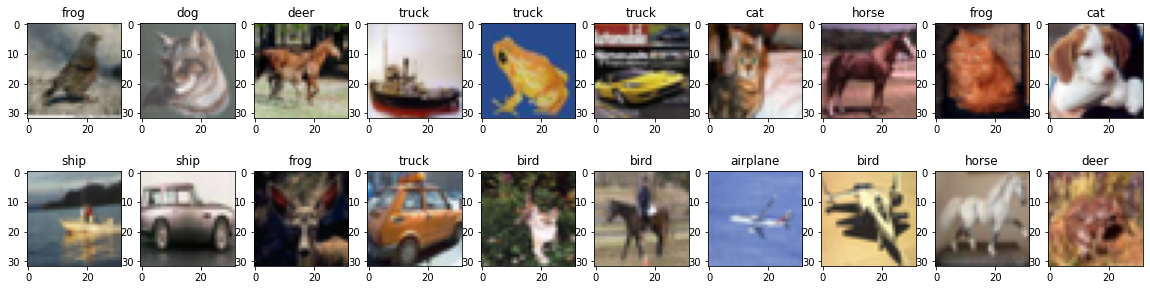

In [94]:
batch_size = 20
fig = plt.figure(figsize=(20,5))
for i in range(batch_size):
    ax = fig.add_subplot(2,batch_size/2,i+1)
    ax.imshow(test_data[i],cmap='gray')
    ax.set_title(classes[np.argmax(prediction[i])])

In [32]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [96]:
def create_cnn_model():
    inp = Input(shape=(32,32,3))
    
    conv_1 = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=reg,input_shape=(32,32,3),padding='same')(inp)
    batch_1 = BatchNormalization()(conv_1)
    
    
    conv_2 = Conv2D(64, (3, 3), activation='relu',kernel_regularizer=reg,padding='same')(batch_1)
    batch_2 = BatchNormalization()(conv_2)
    
    conv_3 = Conv2D(64, (3, 3), activation='relu',kernel_regularizer=reg,padding='same')(batch_2)
    pool_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    batch_3 = BatchNormalization()(pool_3)
    drop_3 = Dropout(rate=0.2)(batch_3)
    
    conv_4 = Conv2D(128, (3, 3), activation='relu',kernel_regularizer=reg,padding='same')(drop_3)
    batch_4 = BatchNormalization()(conv_4)
    
    conv_5 = Conv2D(128, (3, 3), activation='relu',kernel_regularizer=reg,padding='same')(batch_4)
    pool_4 = MaxPooling2D(pool_size=(2, 2))(conv_5)
    batch_5 = BatchNormalization()(pool_4)
    drop_4 = Dropout(rate=0.2)(batch_5)
    
    
    flat = Flatten()(drop_4)
    
    dense_1 = Dense(512,activation='relu',kernel_regularizer=reg)(flat)
    batch_dense = BatchNormalization()(dense_1)
    drop_dense = Dropout(rate=0.4)(batch_dense)

    out = Dense(10,activation='softmax')(drop_dense)
    
    model = Model(inputs = inp, outputs = out)
    
    return model

In [97]:
from keras.regularizers import l2

reg = l2(1e-4)

In [98]:
model_cnn =create_cnn_model()
model_cnn.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)       

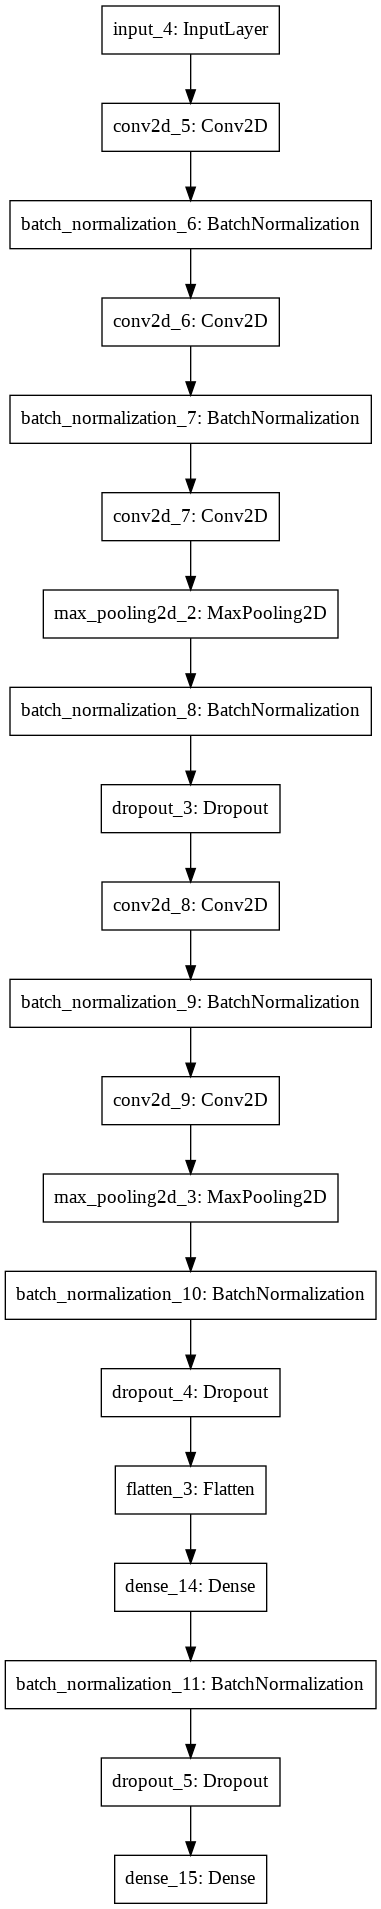

In [99]:
tf.keras.utils.plot_model(model_cnn, to_file='model_cnn.png')

In [100]:
model_cnn.compile(optimizer = opt, loss='categorical_crossentropy',metrics=['accuracy'])

path = "log/fits3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)

In [101]:
model_cnn.fit(X_train,y_train,epochs=10, validation_data=(X_val,y_val),callbacks=[tensorboard_callback],steps_per_epoch=3000)

Epoch 1/10
3000/3000 [==============================] - 25s 8ms/step - loss: 1.9524 - accuracy: 0.5152 - val_loss: 1.5753 - val_accuracy: 0.6135
Epoch 2/10
3000/3000 [==============================] - 25s 8ms/step - loss: 1.4674 - accuracy: 0.6780 - val_loss: 1.3320 - val_accuracy: 0.7486
Epoch 3/10
3000/3000 [==============================] - 24s 8ms/step - loss: 1.4297 - accuracy: 0.7305 - val_loss: 1.3531 - val_accuracy: 0.7657
Epoch 4/10
3000/3000 [==============================] - 24s 8ms/step - loss: 1.4057 - accuracy: 0.7596 - val_loss: 1.3482 - val_accuracy: 0.7858
Epoch 5/10
3000/3000 [==============================] - 24s 8ms/step - loss: 1.3905 - accuracy: 0.7786 - val_loss: 1.3262 - val_accuracy: 0.7943
Epoch 6/10
3000/3000 [==============================] - 24s 8ms/step - loss: 1.3546 - accuracy: 0.7903 - val_loss: 1.3073 - val_accuracy: 0.8075
Epoch 7/10
3000/3000 [==============================] - 24s 8ms/step - loss: 1.3343 - accuracy: 0.7998 - val_loss: 1.3670 - val_ac

In [102]:
test_data

array([[[[0.38431373, 0.41176471, 0.42352941],
         [0.36078431, 0.39607843, 0.41568627],
         [0.35686275, 0.39607843, 0.41960784],
         ...,
         [0.61568627, 0.61568627, 0.57254902],
         [0.6745098 , 0.67058824, 0.62352941],
         [0.76470588, 0.75294118, 0.70196078]],

        [[0.39215686, 0.41568627, 0.42745098],
         [0.36078431, 0.38823529, 0.40784314],
         [0.35294118, 0.38823529, 0.40784314],
         ...,
         [0.65882353, 0.65490196, 0.60784314],
         [0.69019608, 0.67843137, 0.63137255],
         [0.76470588, 0.74509804, 0.69411765]],

        [[0.41960784, 0.43529412, 0.44705882],
         [0.38431373, 0.40784314, 0.41960784],
         [0.35686275, 0.39215686, 0.40392157],
         ...,
         [0.7254902 , 0.71764706, 0.66666667],
         [0.71372549, 0.69803922, 0.65098039],
         [0.7372549 , 0.71372549, 0.65490196]],

        ...,

        [[0.39607843, 0.38823529, 0.34901961],
         [0.34901961, 0.34509804, 0.30196078]

In [103]:
prediction_cnn=model_cnn.predict(test_data)

In [104]:
target=[]
for i in range(len(prediction_cnn)):
  p=np.argmax(prediction_cnn[i])
  target.append(p)

In [108]:
for i in target:
  print(i)

2
3
7
8
6
1
3
7
3
5
8
1
4
1
4
7
0
0
5
6
5
9
4
8
4
0
8
7
0
7
7
3
2
4
2
0
6
4
8
4
5
2
5
1
4
3
5
2
4
4
2
8
7
5
8
1
1
5
1
0
7
1
7
6
1
1
9
8
2
1
6
6
9
5
2
2
4
6
4
8
4
5
8
9
1
4
3
6
6
4
5
6
8
8
9
0
9
7
1
6
8
5
6
2
4
9
4
8
3
0
4
2
9
2
1
5
6
5
0
2
9
6
1
0
6
3
7
0
1
8
4
5
0
8
3
7
9
0
9
6
7
8
5
4
4
6
4
8
2
0
2
4
2
8
5
5
5
5
2
3
5
2
9
8
7
5
6
1
8
1
2
5
9
2
1
6
0
2
5
7
2
5
2
7
0
6
4
7
4
3
6
8
0
5
7
6
4
6
8
1
1
5
2
5
8
8
1
0
0
3
3
8
1
5
6
8
6
6
1
3
5
4
3
7
5
7
3
0
3
7
7
6
0
1
9
8
8
8
0
7
1
4
2
5
2
4
3
2
6
1
8
8
9
9
6
5
3
8
0
2
4
8
2
9
8
3
0
1
0
4
8
8
8
9
3
6
1
6
3
1
0
5
5
1
4
2
4
4
1
4
3
4
0
1
8
1
3
3
9
2
2
2
3
0
3
4
4
9
5
9
6
3
7
1
1
3
2
3
8
0
5
9
1
9
4
9
9
1
8
8
6
6
8
7
3
9
6
2
5
2
2
0
1
2
3
3
6
3
8
2
0
2
9
0
5
4
1
1
9
3
8
4
5
1
6
7
4
3
9
7
8
5
1
0
7
3
5
9
2
5
3
9
3
0
0
5
2
1
7
6
5
7
6
6
8
4
4
2
4
7
1
6
5
8
7
9
1
9
6
6
1
5
8
7
9
4
3
3
5
9
1
0
8
3
9
0
3
6
3
3
4
2
3
8
2
8
9
4
7
1
2
8
0
9
9
7
2
9
9
5
9
5
6
5
2
4
1
5
1
1
3
6
8
2
2
3
8
5
8
0
8
7
5
9
6
9
1
3
5
3
8
2
2
9
3
9
4
5
1
7
4
6
6
9
3
4
0
6
2
3


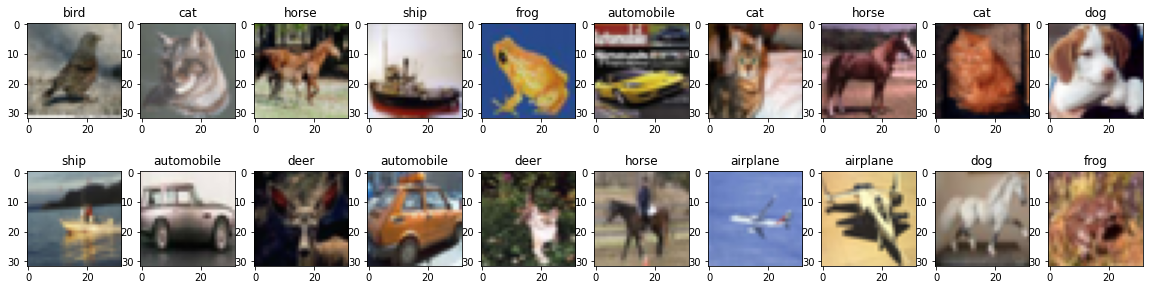

In [107]:
batch_size = 20
fig = plt.figure(figsize=(20,5))
for i in range(batch_size):
    ax = fig.add_subplot(2,batch_size/2,i+1)
    ax.imshow(test_data[i],cmap='gray')
    ax.set_title(classes[np.argmax(prediction_cnn[i])])

In [33]:
#transfer learning

vgg= tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
    classes=10
)

In [34]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [35]:
for layers in resnet.layers:
  layers.trainable = True

NameError: ignored

In [37]:
flat = Flatten()(vgg.output)
    
dense_1 = Dense(1024,activation='relu')(flat)
drop_dense = Dropout(rate=0.4)(dense_1)

dense_2 = Dense(512,activation='relu')(drop_dense)
drop_dense_1 = Dropout(rate=0.3)(dense_2)

dense_3 = Dense(256,activation='relu')(drop_dense_1)
drop_dense_2 = Dropout(rate=0.2)(dense_3)

dense_4 = Dense(128,activation='relu')(drop_dense_2)

out = Dense(10,activation='softmax')(dense_4)
    
model = Model(inputs = vgg.input, outputs = out)
    
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

In [38]:
opt = Adam(lr=0.01,decay=0.0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [39]:
model.compile(optimizer = opt, loss='categorical_crossentropy',metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, 
                                               restore_best_weights=True,
                                               verbose=1)

In [40]:
model.fit(X_train,y_train,epochs=20, validation_data=(X_val,y_val),callbacks=[callback],batch_size=100)

Epoch 1/20
500/500 [==============================] - 29s 58ms/step - loss: 510165536.0000 - accuracy: 0.1006 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 2/20
500/500 [==============================] - 29s 59ms/step - loss: 2.3034 - accuracy: 0.1008 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 3/20
500/500 [==============================] - 30s 59ms/step - loss: 2.3034 - accuracy: 0.0993 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 4/20
500/500 [==============================] - 29s 59ms/step - loss: 2.3037 - accuracy: 0.0997 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/20
500/500 [==============================] - 30s 59ms/step - loss: 2.3071 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/20
500/500 [==============================] - 29s 59ms/step - loss: 2.3033 - accuracy: 0.1004 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 7/20
359/500 [====================>.........] - ETA: 7s - loss: 2.3033 - accuracy: 0.0998

KeyboardInterrupt: ignored

In [158]:
prediction_cnn=model.predict(test_data)

In [160]:
target=[]
for i in range(len(prediction_cnn)):
  p=np.argmax(prediction_cnn[i])
  target.append(p)

In [161]:
for i in target:
  print(i)

2
3
7
8
6
1
5
7
3
5
8
1
4
1
6
7
0
2
7
6
5
9
4
8
4
0
0
7
0
7
7
5
2
4
2
0
3
4
4
4
5
2
5
1
4
3
4
2
4
4
3
8
7
5
8
1
1
3
9
0
7
1
7
6
1
1
9
8
2
1
6
6
9
1
2
0
2
6
4
8
4
5
8
9
1
7
3
6
3
4
7
8
8
8
1
0
9
7
1
6
8
5
2
8
7
9
4
3
5
0
3
0
0
0
1
4
6
5
0
2
1
6
1
0
6
6
1
8
1
8
4
2
0
8
5
7
9
0
9
6
7
1
3
7
4
6
3
8
2
0
3
4
2
8
5
5
5
5
2
0
2
0
9
8
7
5
6
1
8
1
2
7
9
2
1
6
0
2
3
7
6
3
2
0
0
4
4
7
4
2
3
8
0
5
0
0
4
6
8
1
8
2
2
4
8
0
1
0
0
3
2
8
1
5
6
8
2
2
1
6
4
4
5
7
5
7
3
0
3
7
5
6
3
1
9
8
8
8
0
7
1
7
2
5
2
4
3
4
6
1
9
8
0
9
6
5
3
8
0
2
4
8
2
9
8
3
2
1
0
2
8
8
8
9
3
6
1
6
3
1
0
7
3
1
4
0
4
7
0
4
3
4
0
1
0
1
3
3
9
2
2
7
4
0
0
0
4
9
5
9
2
3
7
1
1
3
2
3
8
0
5
8
1
9
4
9
9
1
8
8
6
4
8
7
3
9
6
2
5
2
2
0
1
2
3
4
6
3
8
7
0
2
0
0
3
4
1
1
9
0
8
7
3
1
1
7
4
5
9
7
8
6
1
0
7
3
5
9
2
5
3
9
4
0
4
5
2
1
7
8
4
7
3
6
8
4
4
2
4
7
8
6
5
8
7
9
1
9
6
2
1
5
8
7
9
4
3
3
4
0
3
0
8
3
9
0
3
6
5
3
7
2
3
8
2
8
9
4
7
1
2
0
0
9
7
4
3
0
1
5
9
7
3
5
4
4
1
3
1
1
3
7
8
7
4
3
8
5
1
0
8
7
7
9
6
9
1
4
5
3
8
2
7
1
0
9
4
5
1
7
6
6
7
9
2
4
0
6
8
3


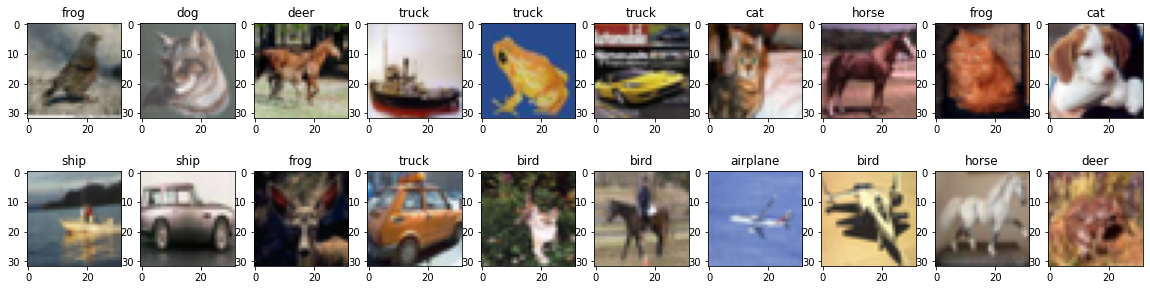

In [163]:
batch_size = 20
fig = plt.figure(figsize=(20,5))
for i in range(batch_size):
    ax = fig.add_subplot(2,batch_size/2,i+1)
    ax.imshow(test_data[i],cmap='gray')
    ax.set_title(classes[np.argmax(prediction[i])])